# Neural Network Sentiment Analysis

### Preparing The Environment

In [36]:
# Import library
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
# Read cleansing result
df = pd.read_csv(
    "..\csv_data\cleaned_text.csv",
    sep="\t",
)
df = df.drop('Unnamed: 0', axis=1)
df

,kalimat,sentiment,clean text,clean stopword
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...,warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis jalan sumatera bandung nyaman...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia unboxing paket barang bagus men...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...,duh mahasiswa sombong kasih kartu kuning belaj...
...,...,...,...,...
10995,tidak kecewa,positive,tidak kecewa,tidak kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...,enak masakan kepiting menyenangkan memilih kep...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati partai partai yang telah berkoalisi,hormati partai partai berkoalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi di tol pasteur sudah macet parah bik...,pagi pagi tol pasteur macet parah bikin jengkel


In [3]:
# Check dataset
df.shape

(11000, 4)

In [4]:
# Check data volumes for each sentiment
df.sentiment.value_counts()

sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

## Try 1: Cleaned Text

### Feature Extractions

In [5]:
# Convert column to list
data_preprocessed = df['clean text'].tolist()

In [6]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print("Feature Extraction done!")

Feature Extraction done!


In [7]:
# Save feature extractions result
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

### Split Data into Train and Test Set

In [8]:
# Get sentiment column
classes = df['sentiment']
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: sentiment, Length: 11000, dtype: object

In [9]:
# Split dataset into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

### Model Training

In [10]:
# Model training with neural network method
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)

print("Train done!")

Train done!


In [11]:
# Save model result
pickle.dump(model, open("model.p", "wb"))

### Model Testing

In [17]:
# Check classification report
from sklearn.metrics import classification_report

test = model.predict(X_test)

print("Testing selesai")

print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80       703
     neutral       0.75      0.70      0.72       215
    positive       0.88      0.90      0.89      1282

    accuracy                           0.85      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.84      0.85      0.84      2200



In [18]:
# Cross validation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):
    data_train = X[data[0]]
    target_train = y[data[0]]
    
    data_test = X[data[1]]
    target_test = y[data[1]]
    
    clf = MLPClassifier()
    clf.fit(data_train, target_train)
    
    preds = clf.predict(data_test)
    
    accuracy = accuracy_score(target_test, preds)
    
    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("==================================================")
    
    accuracies.append(accuracy)
    
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.79      0.79       680
     neutral       0.76      0.64      0.70       239
    positive       0.88      0.90      0.89      1281

    accuracy                           0.84      2200
   macro avg       0.81      0.78      0.79      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79       706
     neutral       0.70      0.71      0.71       220
    positive       0.88      0.91      0.89      1274

    accuracy                           0.84      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80       682
     neutral       0.85      0.73      0.78       215
    positive       0.89      0

## Try 2: Cleaned Text (without removing stopwords)

### Feature Extractions

In [19]:
# Convert column to list
data_preprocessed_2 = df['clean text'].tolist()

In [20]:
# Vectorize
count_vects = CountVectorizer()
count_vects.fit(data_preprocessed_2)

X = count_vects.transform(data_preprocessed_2)
print("Feature Extraction done!")

Feature Extraction done!


In [21]:
# Save feature extractions result

pickle.dump(count_vects, open("features.p", "wb"))

### Split Data into Train and Test Set

In [22]:
# Get sentiment column
classes = df['sentiment']

In [23]:
# Split dataset into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

### Model Training

In [24]:
# Model training with neural network method

models = MLPClassifier()
models.fit(X_train, y_train)

print("Train done!")

Train done!


In [25]:
# Save model result
pickle.dump(models, open("models.p", "wb"))

### Model Testing

In [26]:
# Check classification report
from sklearn.metrics import classification_report

test = models.predict(X_test)

print("Testing selesai")

print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80       682
     neutral       0.74      0.68      0.71       225
    positive       0.90      0.89      0.89      1293

    accuracy                           0.85      2200
   macro avg       0.81      0.79      0.80      2200
weighted avg       0.85      0.85      0.85      2200



In [27]:
# Cross validation

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):
    data_train = X[data[0]]
    target_train = y[data[0]]
    
    data_test = X[data[1]]
    target_test = y[data[1]]
    
    clf = MLPClassifier()
    clf.fit(data_train, target_train)
    
    preds = clf.predict(data_test)
    
    accuracy = accuracy_score(target_test, preds)
    
    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("==================================================")
    
    accuracies.append(accuracy)
    
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       680
     neutral       0.78      0.62      0.69       239
    positive       0.87      0.91      0.89      1281

    accuracy                           0.83      2200
   macro avg       0.81      0.77      0.79      2200
weighted avg       0.83      0.83      0.83      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.79      0.76      0.78       706
     neutral       0.72      0.71      0.72       220
    positive       0.88      0.90      0.89      1274

    accuracy                           0.84      2200
   macro avg       0.80      0.79      0.79      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.79      0.80      0.80       682
     neutral       0.86      0.70      0.77       215
    positive       0.89      0

#### <b>Result:</b> Not removing stopwords yields better result.

## Testing chosen model

In [28]:
# Function for text cleansing
def text_cleansing(text):
    # lowercase
    clean_text = str(text).lower()
    # clean URL
    clean_text = re.sub(r'(http\S+|www\S+)', '', clean_text).strip()
    # clean emoticon byte
    clean_text = clean_text.replace("\\", " ")
    clean_text = re.sub(r'\bx[0-9a-fA-F]{2,}', ' ', clean_text)
    clean_text = re.sub(r'\bn\b', ' ', clean_text)
    clean_text = re.sub('\\+', ' ', clean_text)
    clean_text = re.sub('  +', ' ', clean_text)
    # clean punctuations
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', clean_text)
    # clean whitespace
    clean_text = ' '.join([j for j in clean_text.split()])
    return clean_text

In [29]:
# Open model
with open("model.p", "rb") as f:
    lr = pickle.load(f)

In [30]:
# Open feature extractions
vect = pickle.load(open("feature.p", 'rb'))

In [32]:
# Model testing
original_text = '''
aku sedih sekali
'''

clean_text = text_cleansing(original_text)
text_vect = vect.transform([clean_text])
sentiment_result = lr.predict(text_vect)[0]
print("Sentiment:")
print()
print(sentiment_result)

Sentiment:

negative


## Confusion Matrix

In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, test)
conf_mat

array([[ 555,   25,  102],
       [  41,  152,   32],
       [ 111,   29, 1153]], dtype=int64)

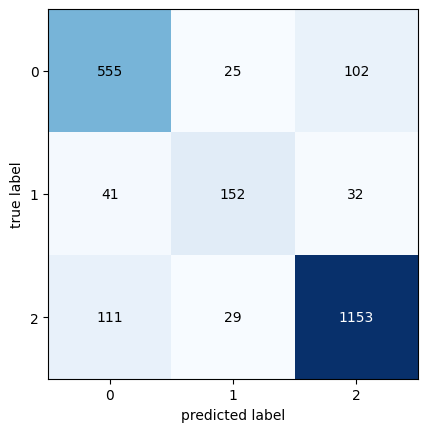

In [37]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat)

plt.show()

In [38]:
# Actual result
y_test.value_counts()

sentiment
positive    1293
negative     682
neutral      225
Name: count, dtype: int64

In [39]:
# Predicted result
unique, counts = np.unique(test, return_counts=True)

print(np.asarray((unique, counts)).T)

[['negative' '707']
 ['neutral' '206']
 ['positive' '1287']]
